<a href="https://colab.research.google.com/github/robitussin/CCINSYSL_EXERCISES/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [33]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [34]:
faces = fetch_olivetti_faces()

In [35]:
faces.data.shape

(400, 4096)

In [36]:
faces.images.shape

(400, 64, 64)

In [37]:
faces.target.shape

(400,)

In [38]:
faces.target[200]

20

#### 1. Plot the image of index zero

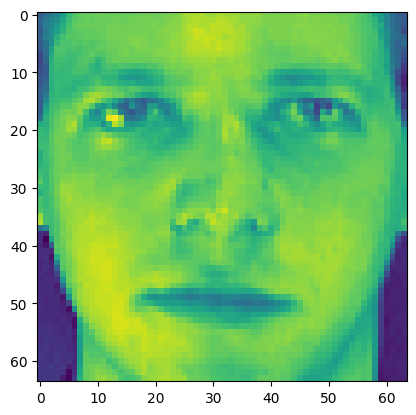

In [39]:
plt.imshow(faces.images[0])

#### 2. Create a subplot of 10 images in a 3x3 configuration

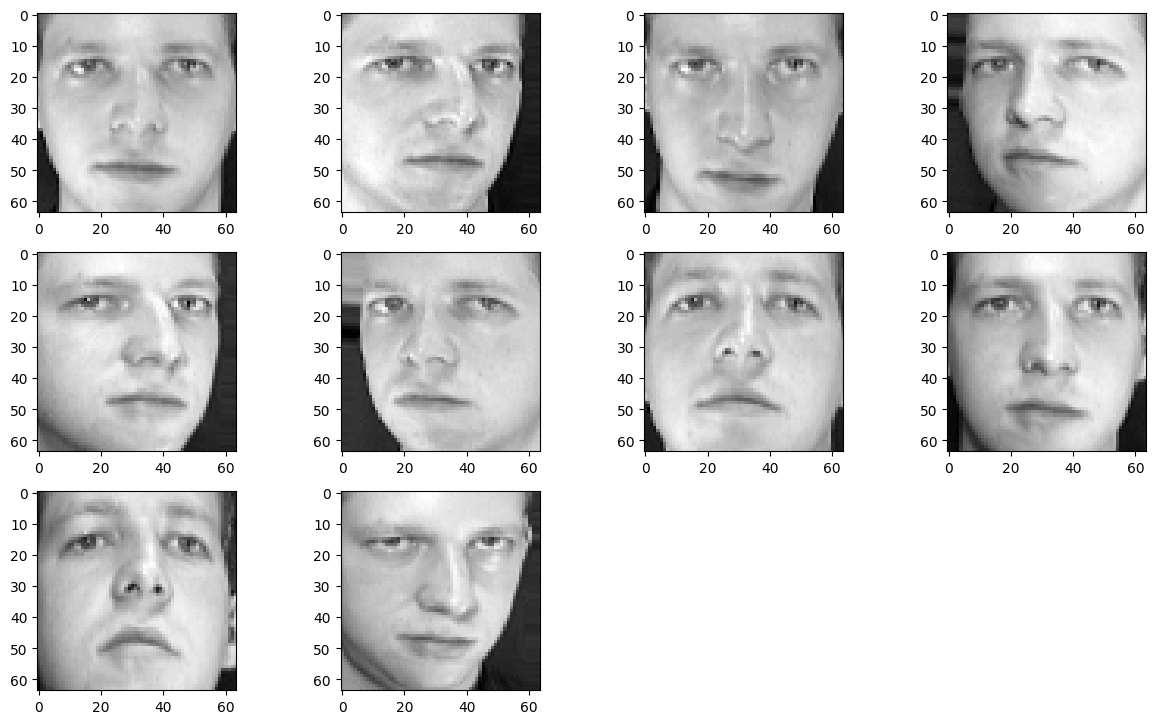

In [53]:
plt.figure(figsize=(15,15))
for index, (data, images) in enumerate(zip(faces.data[0:10], faces.images[0:10])):
    plt.subplot(5, 4, index + 1)
    plt.imshow(images, cmap=plt.cm.gray)


#### 3. Split the data into a training and test set

In [73]:
train_data, test_data, train_images, test_images = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=5)

#### 4. Create a new instance of the LogisticRegression class

In [66]:
logisticRegr = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [79]:
logisticRegr.fit(train_data, train_images)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [80]:
predictions = logisticRegr.predict(test_data)

#### 7. Get the accuracy using the `score()` function

In [81]:
score = logisticRegr.score(test_data, test_images)
print(score)

0.9482758620689655


#### 8. Collect all the misclassified images and create a plot for visualization

In [82]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_images, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

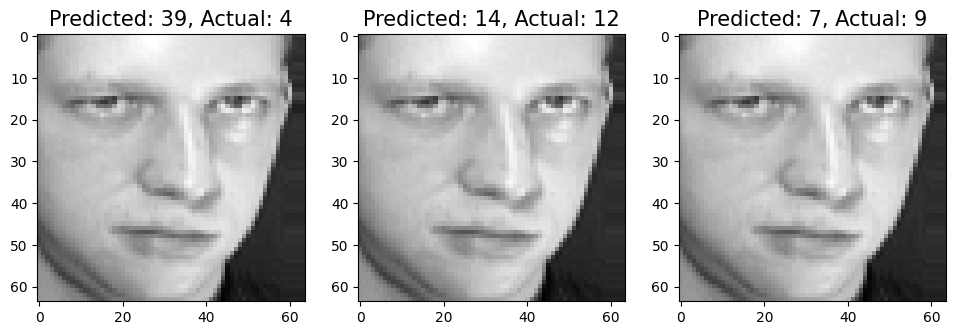

In [84]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(images, cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_images[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [87]:
clf = SGDClassifier(loss="log_loss", penalty="l2")


#### 10. Train the model using the training set using the `fit()` function

In [88]:
clf.fit(train_data, train_images)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [91]:
y_pred = clf.predict(test_data)

#### 12. Get the accuracy using the `score()` function

In [92]:
score = clf.score(test_data, test_images)
print(score)

0.8448275862068966


#### 13. Find the best number of iterations to get the best accuracy

0.8620689655172413
0.7931034482758621
0.896551724137931


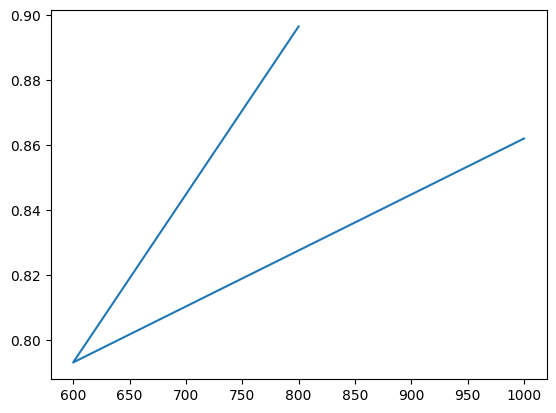

In [98]:
num_iter = [1000, 600, 800]
scores = []

for i in num_iter:

    clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
    clf.fit(train_data, train_images)
    y_pred = clf.predict(test_data)
    score = clf.score(test_data, test_images)

    scores.append(score)
    print(score)

plt.plot(num_iter, scores)